[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


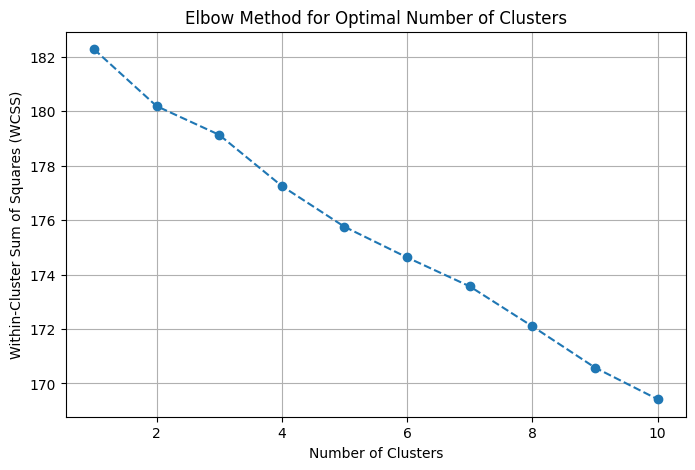


Cluster 12:
Albania, Belarus, Georgia, Moldova (the Republic of), Solomon Islands, Tonga, Bahrain, Maldives, Pakistan, Palestine, Turkey, Djibouti
Most common words:
land: 17
flag: 13
shall: 12
warrior: 11
blessed: 9
god: 8
glory: 8
freedom: 8
nation: 8
sacred: 7


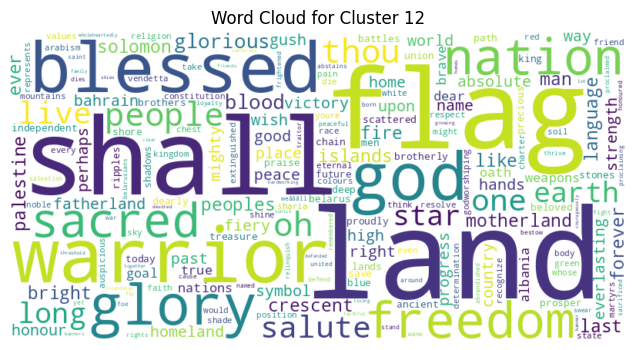


Cluster 3:
Armenia, Germany, Hungary, Italy, Luxembourg, Spain, Haiti, El Salvador, Grenada, Bermuda, Greenland, Australia, Kiribati, Federated States of Micronesia, Afghanistan, Israel, Mongolia, North Korea, Qatar, Singapore, Syria, Thailand, Turkmenistan, Vietnam, Yemen, Benin, Burkina Faso, Comoros, Democratic Republic of Congo, Ethiopia, Gabon, Gambia, Malawi, Niger, Republic of the Congo, Rwanda, Saint Helena, Togo, Tunisia, Western Sahara, Zambia
Most common words:
us: 104
let: 72
one: 42
people: 32
land: 27
every: 24
nation: 21
flag: 20
heart: 19
long: 19


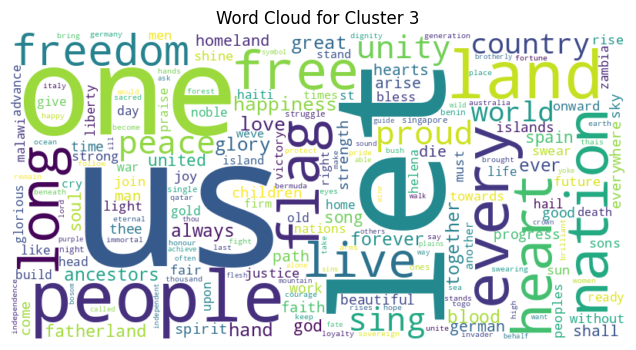


Cluster 5:
Austria, Croatia, Czechia, Finland, Netherlands (the), Guyana, Jamaica, Saint Lucia, Indonesia, Kyrgyzstan, Oman, Botswana, Lesotho, Mauritania, Somalia, Zimbabwe
Most common words:
land: 57
us: 28
free: 15
indonesia: 14
love: 13
great: 12
people: 12
fathers: 10
dear: 10
oh: 9


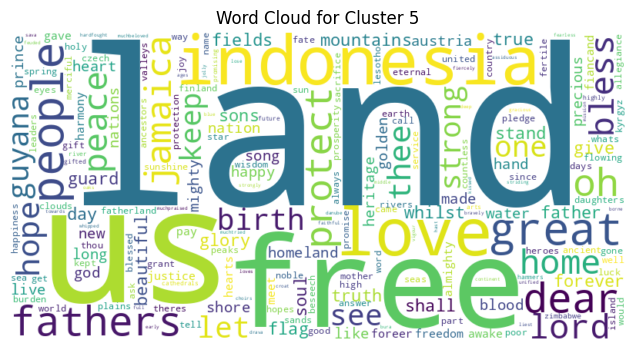


Cluster 4:
Azerbaijan, Bosnia and Herzegovina, Iceland, Montenegro, Norway, Romania, Serbia, Switzerland, Brazil, Colombia, Uruguay, United States of America, Canada, Nicaragua, Puerto Rico, Belize, Antigua and Barbuda, Dominica, New Zealand, Bangladesh, Brunei, India, Philippines, Sri Lanka, Cameroon, Egypt, Ivory Coast, Mauritius, Sierra Leone, Uganda
Most common words:
thy: 88
land: 52
thee: 50
god: 34
love: 30
thou: 28
us: 25
ever: 24
liberty: 22
stand: 21


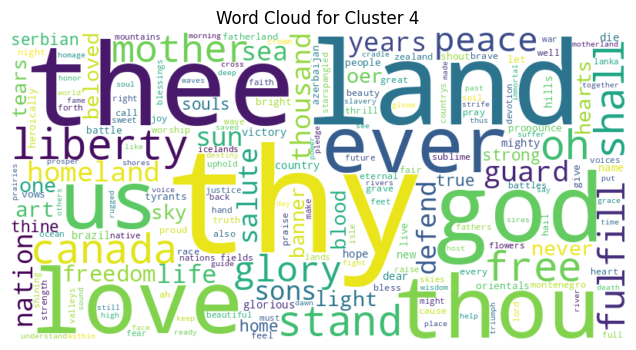


Cluster 6:
Belgium, Estonia, United Kingdom of Great Britain and Northern Ireland (the), Vanuatu, Bhutan, Japan, Jordan, Malaysia, Nepal, Morocco, Seychelles, South Sudan, Swaziland
Most common words:
god: 19
king: 12
us: 11
land: 9
save: 9
queen: 9
live: 8
fatherland: 6
happiness: 6
reign: 6


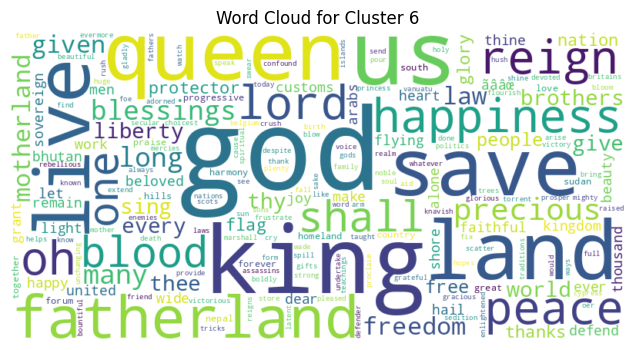


Cluster 10:
Bulgaria, Slovakia, Venezuela, Papua New Guinea, Laos, South Korea, Uzbekistan, Angola, Cape Verde, Central African Republic, Equatorial Guinea, Guinea, Mali, Sao Tome and Principe, Senegal, South Africa
Most common words:
people: 30
us: 23
africa: 18
great: 15
let: 15
guinea: 12
sing: 10
new: 10
nation: 9
united: 9


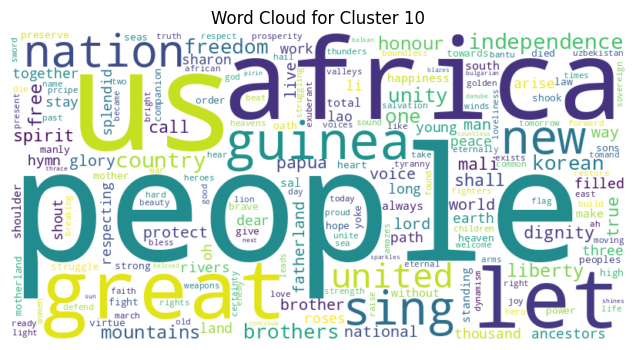


Cluster 1:
Cyprus, Denmark, Greece, Costa Rica, Iran, Liberia
Most common words:
hail: 21
liberty: 7
liberia: 6
glorious: 5
thee: 4
old: 4
thy: 4
shall: 4
prevail: 4
blue: 4


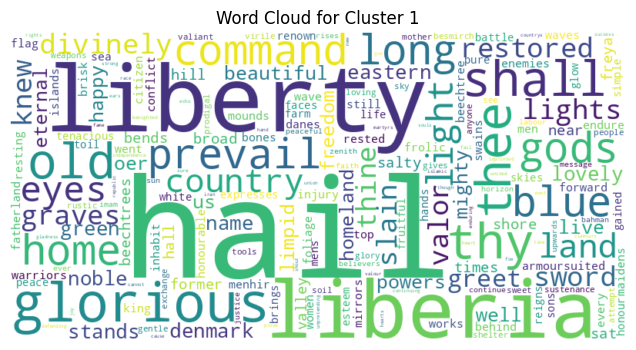


Cluster 2:
France, Ireland, Portugal, Republic of North Macedonia, Sweden, Argentina, Chile, Ecuador, Paraguay, Peru, Suriname, Mexico, Guatemala, Cuba, Dominican Republic, Honduras, Panama, Burundi, Mozambique
Most common words:
free: 32
arms: 23
us: 22
fatherland: 21
shall: 18
homeland: 17
glory: 16
fight: 16
death: 14
liberty: 13


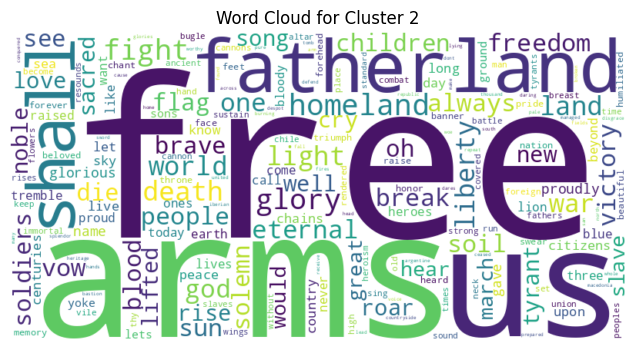


Cluster 9:
Latvia, Trinidad and Tobago, Fiji, Madagascar, Tanzania
Most common words:
bless: 20
god: 12
fiji: 10
ever: 5
africa: 5
tanzania: 5
beloved: 4
fatherland: 4
us: 4
latvia: 3


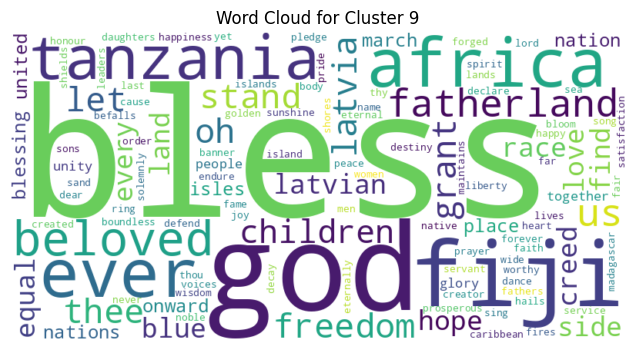


Cluster 11:
Liechtenstein, Lithuania, Bolivia, Barbados, Myanmar, Eritrea, Ghana, Kenya, Nigeria
Most common words:
die: 14
freedom: 14
living: 13
homeland: 12
slaves: 12
nation: 12
name: 8
peace: 8
eritrea: 8
us: 7


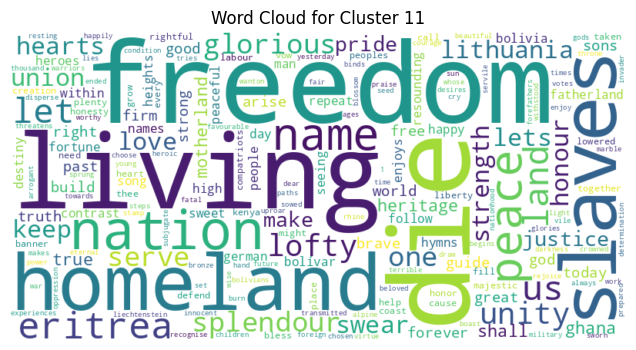


Cluster 8:
Malta, Slovenia, Iraq, Kazakhstan, Kuwait, Lebanon, Saudi Arabia, Tajikistan, United Arab Emirates, Algeria, Chad, Guinea-Bissau, Libya, Namibia, Sudan
Most common words:
country: 33
homeland: 24
glory: 17
god: 15
live: 14
us: 13
witness: 12
flag: 11
land: 10
long: 9


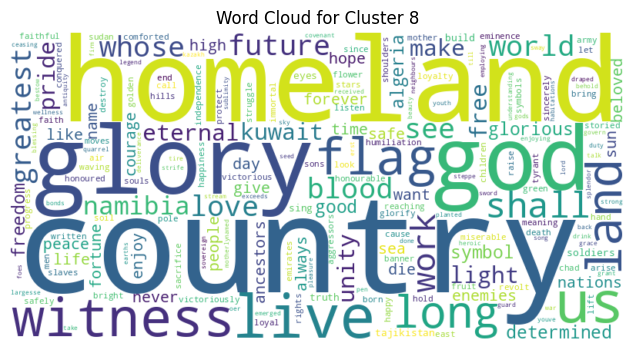


Cluster 7:
Poland, Bahamas, Samoa, China, Macau
Most common words:
march: 12
arise: 11
samoa: 5
us: 4
brave: 4
enemys: 4
gunfire: 4
shall: 3
god: 3
waving: 3


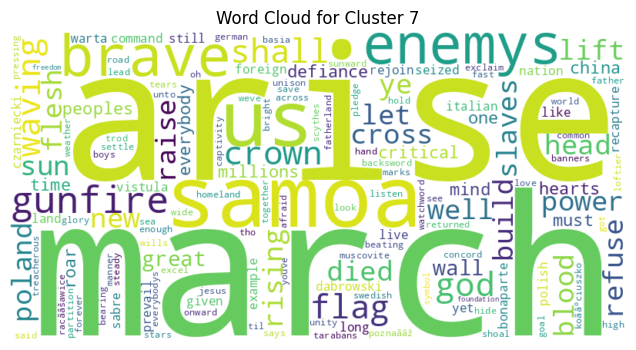


Cluster 0:
Russian Federation (the), Ukraine, Cambodia
Most common words:
us: 5
ãââœ: 4
glory: 4
country: 3
thus: 3
russia: 2
holy: 2
glorious: 2
fatherland: 2
proud: 2


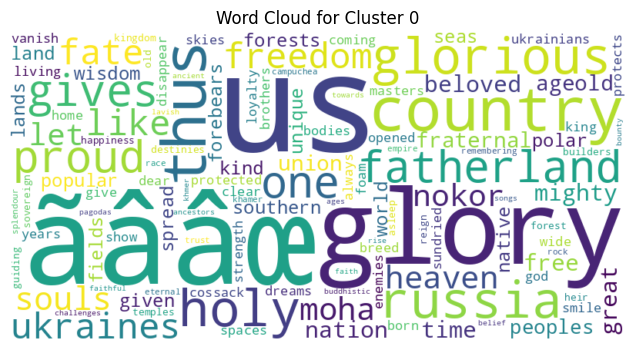

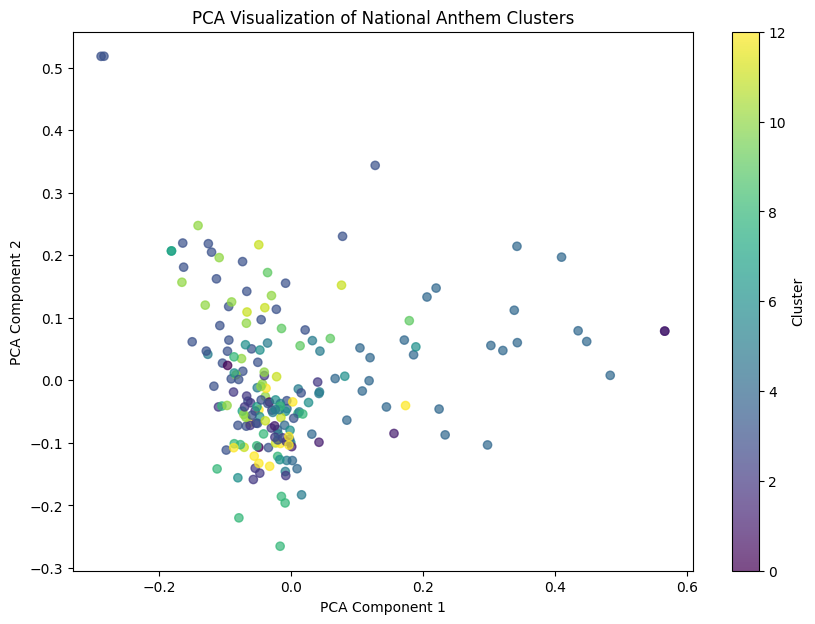

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
# Get the default stop words from NLTK
stop_words = set(stopwords.words('english'))

# Add custom stop words that you specifically want to remove
custom_stop_words = {'to', 'the', 'and', 'our', 'with', 'be','and', 'is', 'of', 'in', 'a', 'will','may','on'}

# Combine the default and custom stop words
stop_words = stop_words.union(custom_stop_words)

def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


# 1. Load the Dataset
# Replace 'your_data.csv' with the path to your CSV file containing national anthems and country information
df = pd.read_csv('/anthems.csv')
world_map = pd.read_csv('/world_country_and_usa_states_latitude_and_longitude_values.csv')
merged_data = pd.merge(df, world_map, on='Country', how='left')
# 2. Preprocess Text Data
# Example preprocessing: Remove punctuation, convert to lowercase, and remove numbers
merged_data['Anthem'] = merged_data['Anthem'].str.replace('[^\w\s]', '', regex=True).str.lower()
# Apply the function to the text column
merged_data['Anthem'] = merged_data['Anthem'].apply(remove_stop_words)

# 3. Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(merged_data['Anthem'])

# 4. Determine Optimal Number of Clusters (optional: using the elbow method)
# Use elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# 5. Fit K-Means Clustering
# Assuming optimal number of clusters found is 5 as per the report
optimal_clusters = 13
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(tfidf_matrix)

# 6. Analyze Clusters and Print Nations in Each Cluster
cluster_groups = merged_data['Cluster'].unique()
for cluster in cluster_groups:
    cluster_data = merged_data[merged_data['Cluster'] == cluster]

    # Print the nations in each cluster
    countries_in_cluster = cluster_data['Country'].tolist()
    print(f"\nCluster {cluster}:")
    print(", ".join(countries_in_cluster))

    # Additional analysis like word frequency and word clouds
    all_words = ' '.join(cluster_data['Anthem']).split()
    word_freq = Counter(all_words)

    print("Most common words:")
    most_common_words = word_freq.most_common(10)
    for word, freq in most_common_words:
        print(f"{word}: {freq}")

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Cluster {cluster}")
    plt.show()

# 7. Optional: Visualize Clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=merged_data['Cluster'], cmap='viridis', alpha=0.7)
plt.title('PCA Visualization of National Anthem Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [2]:
import plotly.express as px

fig = px.choropleth(
    merged_data,
    locations="Country",
    locationmode="country names",
    color="Cluster",
    hover_name="Country",
    title="National Anthems Clusters on World Map",
    # Use a discrete color scale instead of a continuous one
    color_discrete_sequence=px.colors.qualitative.Bold,
)
fig.update_layout(width=800, height=600)
fig.show(config={'scrollZoom': False})
fig.show()

In [3]:
# Define cluster labels based on the report's findings
cluster_labels = {
    0: "Unity and national glory",
    1: "Liberty and Triumph",
    2: "Freedom and Resistance",
    3: "Unity and collective strength",
    4: "Devotion and loyalty",
    5: "Love for land and heritage",
    6: "Monarchy and divine protection",
    7: "Call for action and Valor",
    8: "Homeland and Patriotism",
    9: "Fatherland, blessings and divinity",
    10: "Unity and Aspirational",
    11: "Struggle and sacrifice",
    12: "National Glory and Unity"
}


In [4]:
merged_data['Cluster_Label'] = merged_data['Cluster'].map(cluster_labels)
merged_data.head()

,Country,Alpha-2,Alpha-3,Continent,Anthem,country_code,latitude,longitude,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state,Cluster,Cluster_Label
0,Albania,AL,ALB,Europe,around flag stand united one wish one goal sac...,AL,41.153332,20.168331,CO,39.550051,-105.782067,Colorado,12,National Glory and Unity
1,Armenia,AM,ARM,Europe,fatherland free independent centuries lived su...,AM,40.069099,45.038189,CT,41.603221,-73.087749,Connecticut,3,Unity and collective strength
2,Austria,AT,AUT,Europe,land mountains land river land fields land cat...,AT,47.516231,14.550072,IA,41.878003,-93.097702,Iowa,5,Love for land and heritage
3,Azerbaijan,AZ,AZE,Europe,azerbaijan azerbaijan glorious fatherland valo...,AZ,40.143105,47.576927,IN,40.551217,-85.602364,Indiana,4,Devotion and loyalty
4,Belarus,BY,BLR,Europe,belarusians peaceful people wholeheartedly dev...,BY,53.709807,27.953389,NV,38.802610,-116.419389,Nevada,12,National Glory and Unity


In [24]:
from transformers import BertTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import torch
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset, random_split
from transformers import BertForSequenceClassification, AdamW, get_cosine_schedule_with_warmup
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text
merged_data['Input_Ids'] = merged_data['Anthem'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True, max_length=512))

X = merged_data['Input_Ids'].tolist()
y = merged_data['Cluster_Label'].tolist()

# Pad sequences to have the same length
X = pad_sequences(X, maxlen=512, padding='post', truncating='post')

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Oversampling the minority classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(f"Original dataset shape: {X.shape}")
print(f"Resampled dataset shape: {X_resampled.shape}")

# Convert back to PyTorch tensors for model training
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)  # Encode string labels to integers
input_ids = torch.tensor(X_resampled)
labels = torch.tensor(y_resampled_encoded)

# Create attention masks
attention_masks = torch.tensor([[float(i != 0) for i in seq] for seq in X_resampled])

# Compute class weights for the original labels (optional)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels.numpy())
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Create TensorDataset
dataset = TensorDataset(input_ids, attention_masks, labels)

# Split into training and validation datasets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoader
batch_size = 4
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load pre-trained BERT model with a classification head
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(le.classes_),  # Number of unique cluster labels
    output_attentions=False,
    output_hidden_states=False
)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8, weight_decay=0.01)

# Total number of training steps
total_steps = len(train_dataloader) * 10  # Adjust as needed

# Create the learning rate scheduler
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Define loss function with class weights (optional)
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)

# Function to train the model
def train_model(model, train_dataloader, val_dataloader, epochs):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_dataloader:
            batch_input_ids, batch_attention_mask, batch_labels = tuple(t.to(device) for t in batch)
            model.zero_grad()
            outputs = model(batch_input_ids, attention_mask=batch_attention_mask, labels=batch_labels)
            logits = outputs.logits

            # Calculate loss with class weights
            loss = loss_fn(logits, batch_labels)
            total_loss += loss.item()

            loss.backward()
            optimizer.step()
            scheduler.step()

        # Validation phase
        model.eval()
        val_loss = 0
        val_accuracy = 0
        for batch in val_dataloader:
            batch_input_ids, batch_attention_mask, batch_labels = tuple(t.to(device) for t in batch)
            with torch.no_grad():
                outputs = model(batch_input_ids, attention_mask=batch_attention_mask, labels=batch_labels)
                logits = outputs.logits

                loss = outputs.loss
                val_loss += loss.item()
                preds = torch.argmax(logits, dim=1)
                val_accuracy += (preds == batch_labels).float().mean()

        # Print loss and accuracy
        print(f"Epoch {epoch + 1}/{epochs}")
        print(f"Training loss: {total_loss / len(train_dataloader)}")
        print(f"Validation loss: {val_loss / len(val_dataloader)}")
        print(f"Validation accuracy: {val_accuracy / len(val_dataloader)}")

# Function to evaluate the model
def evaluate_model(model, dataloader):
    model.eval()
    predictions, true_labels = [], []
    for batch in dataloader:
        batch_input_ids, batch_attention_mask, batch_labels = tuple(t.to(device) for t in batch)
        with torch.no_grad():
            outputs = model(batch_input_ids, attention_mask=batch_attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        labels = batch_labels.cpu().numpy()
        predictions.extend(preds)
        true_labels.extend(labels)

    return predictions, true_labels

# Train the model with oversampled data
train_model(model, train_dataloader, val_dataloader, epochs=10)

# Evaluate the model
predictions, true_labels = evaluate_model(model, val_dataloader)

# Generate a classification report
unique_classes = set(predictions + true_labels)
target_names = [label for label in le.classes_ if le.transform([label])[0] in unique_classes]
print("Classification Report:")
print(classification_report(true_labels, predictions, target_names=target_names, zero_division=1))


Original dataset shape: (190, 512)
Resampled dataset shape: (533, 512)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



Epoch 1/10
Training loss: 2.5788676070275707
Validation loss: 2.4168148040771484
Validation accuracy: 0.22530865669250488
Epoch 2/10
Training loss: 2.216821682787387
Validation loss: 1.8776641775060583
Validation accuracy: 0.5030863881111145
Epoch 3/10
Training loss: 1.5211730772089735
Validation loss: 1.2232143029018685
Validation accuracy: 0.7345679402351379
Epoch 4/10
Training loss: 0.8572653320348151
Validation loss: 0.8538940317100949
Validation accuracy: 0.8117283582687378
Epoch 5/10
Training loss: 0.5148521750886864
Validation loss: 0.6443090482994362
Validation accuracy: 0.8518518805503845
Epoch 6/10
Training loss: 0.3183515698553246
Validation loss: 0.5761435815581569
Validation accuracy: 0.8703703880310059
Epoch 7/10
Training loss: 0.21943891215547223
Validation loss: 0.5423260888567677
Validation accuracy: 0.8703703880310059
Epoch 8/10
Training loss: 0.17703456932974754
Validation loss: 0.5367077365517616
Validation accuracy: 0.8703703880310059
Epoch 9/10
Training loss: 0.16